# Цель лабораторной работы

Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.
        
# Ход выполнения работы

### Текстовое описание набора данных
В качестве набора данных используется dataset рейтингов университетов мира на основании трёх рейтингов. Датасет доступен по адресу: https://www.kaggle.com/mylesoneill/world-university-rankings

Из набора данных будет рассматриваться только файл `cwurData.csv`.

Описание столбцов:

* `world_rank` - мировой рейтинг университета

* `institution` - название университета

* `country` - страна, в которой расположен университет

* `national_rank` - рейтинг университета в стране его нахождения

* `quality_of_education` - рейтинг качества образования

* `quality_of_faculty` - рейтинг качества профессорско-преподавательского состава

* `publications` - рейтинг публикаций

* `infuence` - рейтинг влияния

* `citations` - количество студентов в университете

* `broad_impact` - рейтинг за широкое влияние (предоставлен только за 2014 и 2015 гг. Остальное - пропуски)

* `patents` - рейтинг за патенты

* `score` - общий балл, используемый для определения мирового рейтинга

* `year` - год рейтинга (с 2012 по 2015 год)

## Основные характеристики набора данных

Подключаем все необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Подключение датасета
data = pd.read_csv('../datasets/cwurData.csv', sep=',')

In [4]:
# Размер данных
data.shape

(2200, 14)

In [5]:
# Типы колонок
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [6]:
# Проверка на пропущенные значения
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [7]:
# Первые пять строк датасета
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [8]:
total_count = data.shape[0]
print ("Всего строк {}".format(total_count))

Всего строк 2200


## Обработка пропусков в данных

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((2200, 14), (2200, 13))

In [10]:
# Удаление строк, слдержащих пустые заначения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((2200, 14), (2000, 14))

In [11]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
(data.shape, data_new_3.shape)

((2200, 14), (2200, 14))

In [12]:
data_new_3.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012


# "Внедрение значений"
## Обработка пропусков  вчисловых данных

In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка broad_impact. Тип данных float64. Количество пустых значений 200, 9.09%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2195,969.0
2196,981.0
2197,975.0
2198,975.0


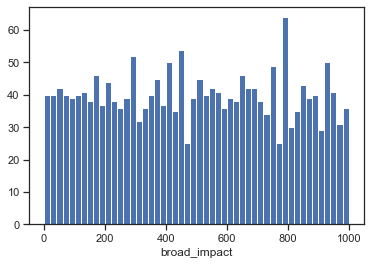

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
data_num_BroadImpact = data_num[['broad_impact']]
data_num_BroadImpact.head()

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_BroadImpact)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [19]:
strategies=['mean', 'median', 'most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_BroadImpact)
    return data_num_imp[mask_missing_values_only]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 4

In [22]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 4

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 

In [24]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [25]:
data[['broad_impact']].describe()

,broad_impact
count,2000.000000
mean,496.699500
std,286.919755
min,1.000000
25%,250.500000
50%,496.000000
75%,741.000000
max,1000.000000


In [26]:
test_num_impute_col(data, 'broad_impact', strategies[0])

('broad_impact', 'mean', 200, 496.6995, 496.6995)

In [27]:
test_num_impute_col(data, 'broad_impact', strategies[1])

('broad_impact', 'median', 200, 496.0, 496.0)

In [28]:
test_num_impute_col(data, 'broad_impact', strategies[2])

('broad_impact', 'most_frequent', 200, 642.0, 642.0)

## Кодирование категориальных данных
Преобразуем названия стран, городов, ... в числовые зеачения (label encoding)

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

--------------`institution`-----------------

In [30]:
data_no_null = data_new_2
le = LabelEncoder()
institution_le = le.fit_transform(data_no_null['institution'])

In [31]:
data_no_null['institution'].unique()

array(['Harvard University', 'Stanford University',
       'Massachusetts Institute of Technology', ...,
       'Babeș-Bolyai University', 'Henan Normal University',
       'Southwest Jiaotong University'], dtype=object)

In [32]:
arr_institution_encoded = np.unique(institution_le)
arr_institution_encoded

array([   0,    1,    2, ..., 1020, 1021, 1022])

In [33]:
le.inverse_transform([n for n in range(1023)])

array(['AGH University of Science and Technology', 'Aalborg University',
       'Aalto University', ..., 'École normale supérieure de Cachan',
       'École normale supérieure de Lyon', 'Örebro University'],
      dtype=object)

-----------------`county`-------------------

In [34]:
le_country = LabelEncoder()
country_le = le_country.fit_transform(data_no_null['country'])

In [35]:
data_no_null['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'Russia', 'China', 'Taiwan',
       'Sweden', 'Singapore', 'Denmark', 'Germany', 'Netherlands',
       'Italy', 'Belgium', 'Australia', 'Finland', 'Norway',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [36]:
np.unique(country_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

In [37]:
le_country.inverse_transform([n for n in range(59)])

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Puerto Rico',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay'], dtype=object)

In [38]:
data_no_null.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


In [39]:
data_digit = data_no_null.copy()
data_digit["institution"] = institution_le
data_digit['country'] = country_le
data_digit

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,184,54,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,511,54,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,312,54,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,637,57,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,819,57,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,954,37,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,11,14,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,132,4,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,576,48,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [40]:
data_digit.dtypes

world_rank                int64
institution               int32
country                   int32
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

## Масштабирование данных

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [42]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_digit[['broad_impact']])

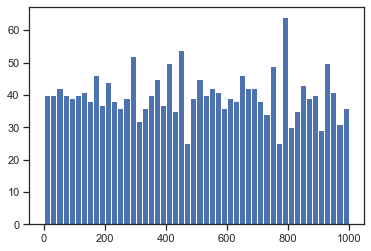

In [43]:
plt.hist(data_digit['broad_impact'], 50)
plt.show()

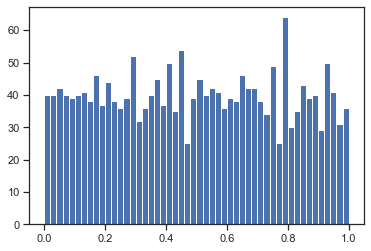

In [44]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandartScaler

In [45]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data_digit[['broad_impact']])

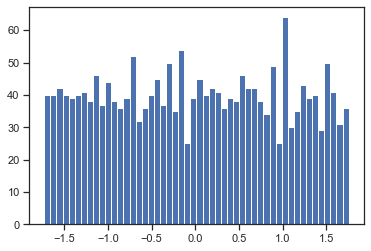

In [46]:
plt.hist(sc2_data, 50)
plt.show()